In [2]:
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
pd.set_option('display.max_rows', 1000)
os.chdir('/Users/alexchandler/kr-calc/csv_files') #change to python script directory
knot_info = pd.read_csv('Knotinfo_data.csv', dtype='object')  

import sklearn
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold
import itertools


# import required module for iterating through directory
import os
import json
# assign directory
os.chdir('/Users/alexchandler/kr-calc') #change to python script directory
directory = 'data'
#we create a dictionary with keys: names of knots
                          #values: dictionaries (keys: nonzero gradings, values: homology dimensions)
homfly_data={}
# sort directory and then iterate over files in that directory, creating a dictionary for easier use
listing = os.listdir(directory)
listing.sort()
for filename in listing:
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        with open(f) as json_file:
            data = json.load(json_file)
            data_dict = {}
            for i in range(int(len(data)/2)):
                data_dict[tuple(data[2*i])]=data[2*i+1]
            homfly_data[filename[:-5]]=data_dict
            
os.chdir('/Users/alexchandler/kr-calc/python_scripts') #change to python script directory
#import all custom written functions from functions.py
from functions import *

In [8]:
aki_rs=all_knot_info[['Name','Rasmussen s', 'Signature']]
mask=all_knot_info['Rasmussen s']!=-all_knot_info['Signature']
aki_rs[mask]

Name  Rasmussen s  Signature
76      9_42            0          2
215   10_132           -2          0
219   10_136            0          2
222   10_139            8         -6
228   10_145           -4          2
235   10_152            8         -6
237   10_154            6         -4
244   10_161            6         -4
624    11n_9            6         -4
627   11n_12            2          0
634   11n_19           -2          4
635   11n_20            0          2
639   11n_24            0         -2
646   11n_31            4         -2
653   11n_38            0         -2
685   11n_70            2         -4
692   11n_77            8         -6
694   11n_79            0         -2
707   11n_92            0          2
711   11n_96            0         -2
753  11n_138            0         -2
798  11n_183            6         -4

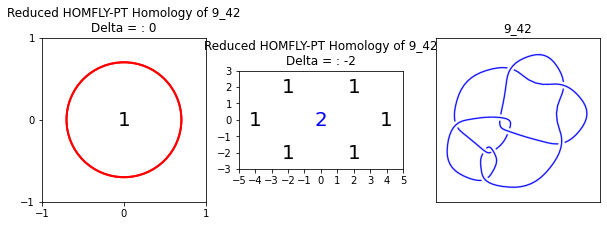

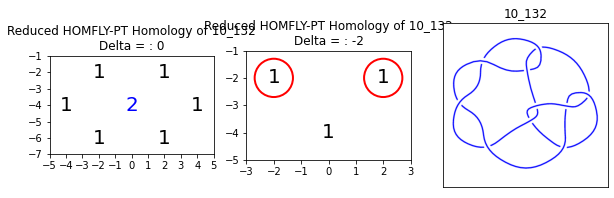

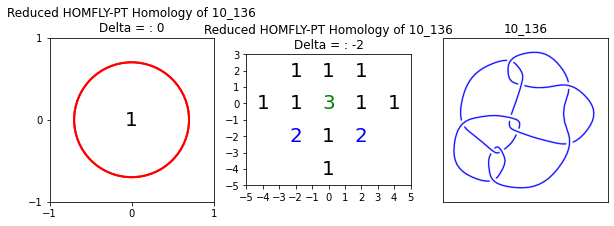

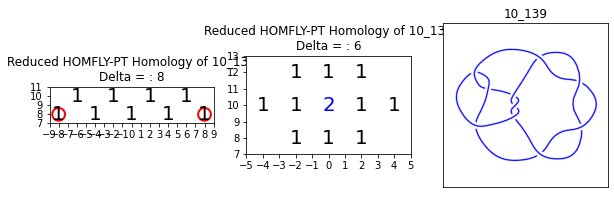

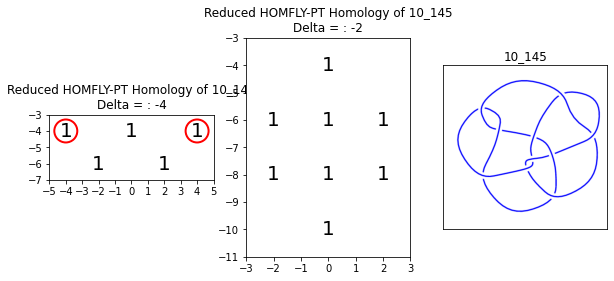

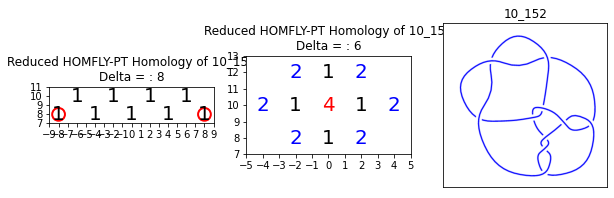

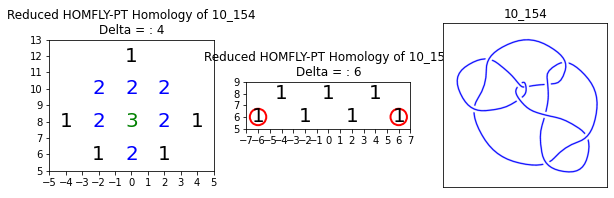

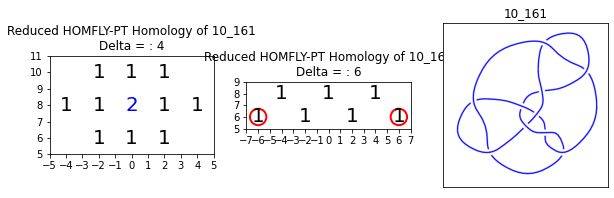

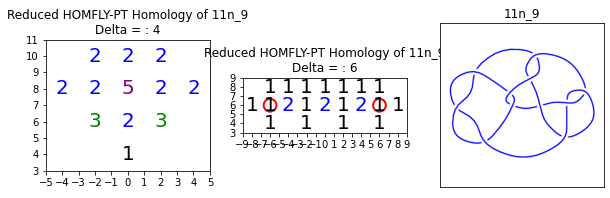

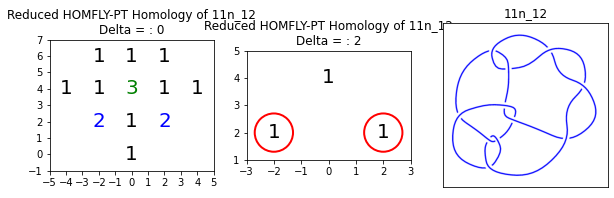

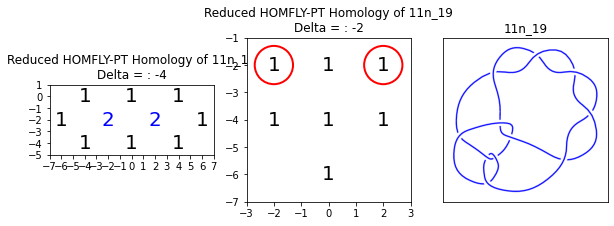

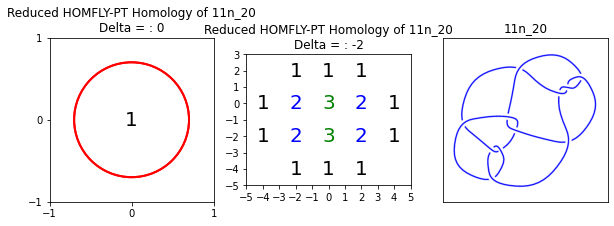

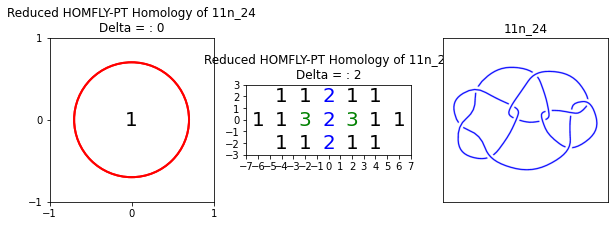

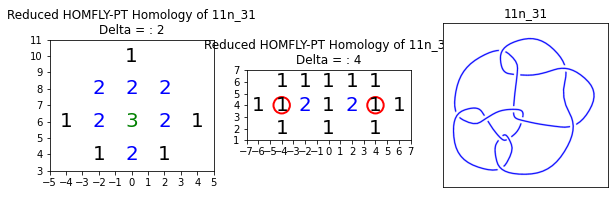

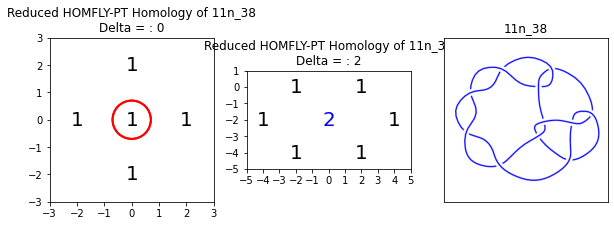

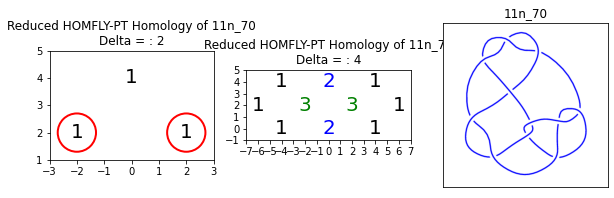

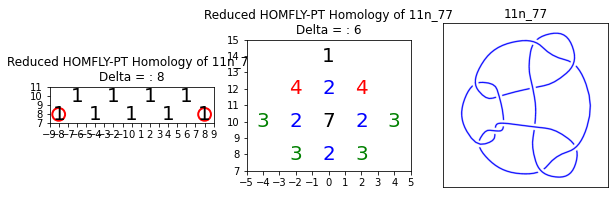

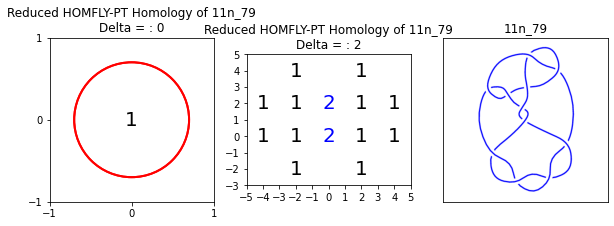

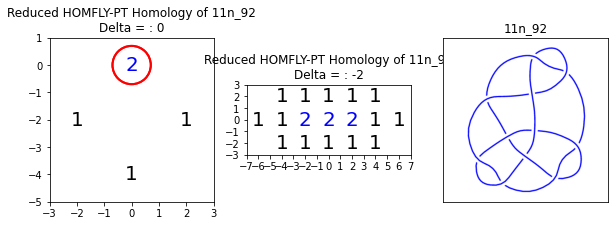

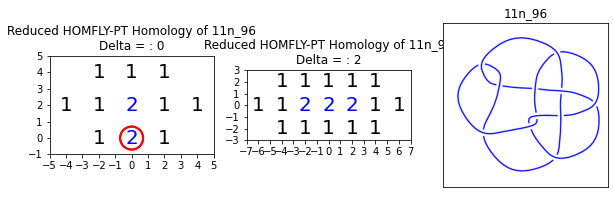

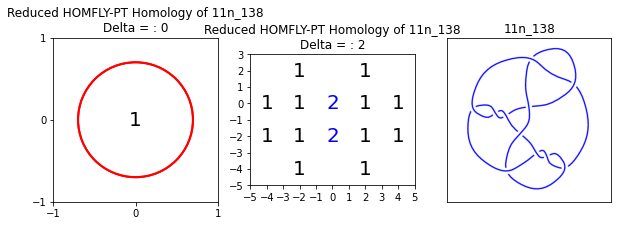

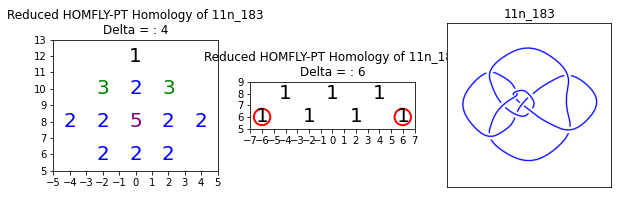

In [10]:
for knot in aki_rs[mask]["Name"]:
    try:
        plot_homology_nonplanar(knot)
    except:
        plot_homology(knot)


In [3]:
#taking a look at the datatypes for each invariant
#we can only use numbers (int64 or float64) and everything else needs to either be converted to a number
#or thrown away (need to figure out what to do with polynomials...)
#lets try and incorporate the largest number of invariants possible
all_knot_info.dtypes

Name                          object
Alternating                   object
Two-Bridge Notation           object
Fibered                       object
Crossing Number                int64
Unknotting Number             object
Genus-3D                       int64
Crosscap Number               object
Bridge Index                   int64
Braid Index                    int64
Braid Length                 float64
Braid Notation                object
Signature                      int64
Nakanishi Index               object
Super Bridge Index            object
Thurston-Bennequin Number     object
Arc Index                      int64
Stick Number                  object
Tunnel Number                float64
Morse-Novikov Number         float64
Alexander                     object
Jones                         object
Conway                        object
HOMFLY                        object
Kauffman                      object
A-Polynomial                  object
Khovanov                      object
K

In [3]:
all_knot_info['Alternating'] = convert_YN_vect(all_knot_info['Alternating'])
all_knot_info['Fibered'] = convert_YN_vect(all_knot_info['Fibered'])
all_knot_info['Unknotting Number'] = (all_knot_info['Unknotting Number']).apply(convert_str_to_float)
all_knot_info = all_knot_info.dropna(subset=['Unknotting Number'])
all_knot_info['Crosscap Number'] = (all_knot_info['Crosscap Number']).apply(convert_str_to_float)
all_knot_info = all_knot_info.dropna(subset=['Crosscap Number'])
all_knot_info['Nakanishi Index'] = (all_knot_info['Nakanishi Index']).apply(convert_str_to_float)
all_knot_info = all_knot_info.dropna(subset=['Nakanishi Index'])
#skipping Thurston-Bennequin for now because I'm not sure how to deal with mirrors... come back to this if needed
all_knot_info['Genus-4D (Top.)'] = (all_knot_info['Genus-4D (Top.)']).apply(convert_str_to_float)
all_knot_info = all_knot_info.dropna(subset=['Genus-4D (Top.)'])
all_knot_info['Concordance Genus'] = (all_knot_info['Concordance Genus']).apply(convert_str_to_float)
all_knot_info = all_knot_info.dropna(subset=['Concordance Genus'])
all_knot_info['Turaev Genus'] = (all_knot_info['Turaev Genus']).apply(convert_str_to_float)
all_knot_info = all_knot_info.dropna(subset=['Turaev Genus'])
all_knot_info['Small or Large'] = (all_knot_info['Small or Large']).apply(convert_small_or_Large)
all_knot_info = all_knot_info.dropna(subset=['Small or Large'])
all_knot_info['Positive Braid'] = convert_YN_vect(all_knot_info['Positive Braid'])
all_knot_info = all_knot_info.dropna(subset=['Positive Braid'])
all_knot_info['Positive'] = convert_YN_vect(all_knot_info['Positive'])
all_knot_info = all_knot_info.dropna(subset=['Positive'])
all_knot_info['SQ-Positive'] = convert_YN_vect(all_knot_info['SQ-Positive'])
all_knot_info = all_knot_info.dropna(subset=['SQ-Positive'])
all_knot_info['Q-Positive'] = convert_YN_vect(all_knot_info['Q-Positive'])
all_knot_info = all_knot_info.dropna(subset=['Q-Positive'])
all_knot_info['L-space'] = (all_knot_info['L-space']).apply(convert_L_space)
all_knot_info = all_knot_info.dropna(subset=['L-space'])
#skipping Nu for now because it appears to depend on orientation (different value for mirror)
#this drops a few hundred examples due to NAN values
all_knot_info['Quasialternating'] = (all_knot_info['Quasialternating']).apply(convert_YN)
all_knot_info = all_knot_info.dropna(subset=['Quasialternating'])
all_knot_info['Almost Alternating'] = (all_knot_info['Almost Alternating']).apply(convert_YN)
all_knot_info = all_knot_info.dropna(subset=['Almost Alternating'])
#skipping adequate because all of its values are either Yes or NAN
all_knot_info['Double Slice Genus'] = (all_knot_info['Double Slice Genus']).apply(convert_str_to_float)
all_knot_info = all_knot_info.dropna(subset=['Double Slice Genus'])

In [4]:
import math
checknan=np.vectorize(math.isnan)

MN_mask = checknan(all_knot_info['Morse-Novikov Number'])
sum(MN_mask)

#ok we'll keep this one and get rid of knots with nan values
all_knot_info = all_knot_info.dropna(subset=['Morse-Novikov Number'])



In [5]:
#not enough of these are known (gives number of nan values)
CC_mask = checknan(all_knot_info['Crosscap Number-4D'])
sum(CC_mask)

177

In [6]:
#not enough of these are known (gives number of nan values)
CCtop_mask = checknan(all_knot_info['Crosscap Number-4D (Top.)'])
sum(CCtop_mask)

399

In [7]:
#not enough of these are known (gives number of nan values)
CG_mask = checknan(all_knot_info['Concordance Genus (Top.)'])
sum(CG_mask)

413

In [8]:
#not enough of these are known (gives number of nan values)
CG_mask = checknan(all_knot_info['Concordance Genus (Top.)'])
sum(CG_mask)

413

In [9]:
#not enough of these are known (gives number of nan values)
CN_mask = checknan(all_knot_info['Clasp Number-4D'])
sum(CN_mask)

331

In [11]:
#converting all int types to float
for col in list(all_knot_info.keys()):
    if all_knot_info[col].dtype=='int64':
        print(col)
        all_knot_info[col]=all_knot_info[col].apply(convert_str_to_float)
        
#shows us all available numerical invariants
numerical_invariants = [col for col in all_knot_info.columns if all_knot_info[col].dtypes=='float64']
numerical_invariants
#makes a dataframe from just the numerical invariants
all_knot_info_numerical = all_knot_info[numerical_invariants]
all_knot_info_numerical

Crossing Number
Genus-3D
Bridge Index
Braid Index
Signature
Arc Index
Genus-4D
Determinant
Rasmussen s
Ozsvath-Szabo tau
Arf Invariant
Epsilon
Planar Support
Size of Homology


Alternating  Fibered  Crossing Number  Unknotting Number  Genus-3D  \
0            1.0      1.0              3.0                1.0       1.0   
1            1.0      1.0              4.0                1.0       1.0   
2            1.0      1.0              5.0                2.0       2.0   
3            1.0      0.0              5.0                1.0       1.0   
4            1.0      0.0              6.0                1.0       1.0   
5            1.0      1.0              6.0                1.0       2.0   
6            1.0      1.0              6.0                1.0       2.0   
7            1.0      1.0              7.0                3.0       3.0   
8            1.0      0.0              7.0                1.0       1.0   
9            1.0      0.0              7.0                2.0       2.0   
10           1.0      0.0              7.0                2.0       1.0   
11           1.0      0.0              7.0                2.0       2.0   
12           1.0      1.0              7.0                1.0       2.0   
13           1.0      1.0              7.0                1.0       2.0   
14           1.0      0.0              8.0                1.0       1.0   
15           1.0      1.0              8.0                2.0       3.0   
16           1.0      0.0              8.0                2.0       1.0   
17           1.0      0.0              8.0                2.0       2.0   
18           1.0      1.0              8.0                2.0       3.0   
19           1.0      0.0              8.0                2.0       2.0   
20           1.0      1.0              8.0                1.0       3.0   
21           1.0      0.0              8.0                2.0       2.0   
22           1.0      1.0              8.0                1.0       3.0   
23           1.0      1.0              8.0                2.0       3.0   
24           1.0      0.0              8.0                1.0       2.0   
25           1.0      1.0              8.0                2.0       2.0   
26           1.0      0.0              8.0                1.0       2.0   
27           1.0      0.0              8.0                1.0       2.0   
28           1.0      0.0              8.0                2.0       2.0   
29           1.0      1.0              8.0                2.0       3.0   
30           1.0      1.0              8.0                1.0       3.0   
31           1.0      1.0              8.0                2.0       3.0   
32           0.0      1.0              8.0                3.0       3.0   
33           0.0      1.0              8.0                1.0       2.0   
34           0.0      1.0              8.0                1.0       2.0   
35           1.0      1.0              9.0                4.0       4.0   
36           1.0      0.0              9.0                1.0       1.0   
37           1.0      0.0              9.0                3.0       3.0   
38           1.0      0.0              9.0                2.0       2.0   
39           1.0      0.0              9.0                2.0       1.0   
40           1.0      0.0              9.0                3.0       3.0   
41           1.0      0.0              9.0                2.0       2.0   
42           1.0      0.0              9.0                2.0       2.0   
43           1.0      0.0              9.0                3.0       3.0   
44           1.0      0.0              9.0                3.0       2.0   
45           1.0      1.0              9.0                2.0       3.0   
46           1.0      0.0              9.0                1.0       2.0   
47           1.0      0.0              9.0                3.0       2.0   
48           1.0      0.0              9.0                1.0       2.0   
49           1.0      0.0              9.0                2.0       2.0   
50           1.0      0.0              9.0                3.0       3.0   
51           1.0      1.0              9.0                2.0       3.0   
52           1.0      0.0     

In [10]:
all_knot_info_numerical.columns

NameError: name 'all_knot_info_numerical' is not defined

In [13]:
features = ['Alternating', 'Fibered', 'Crossing Number', 'Unknotting Number',
       'Genus-3D', 'Crosscap Number', 'Bridge Index', 'Braid Index',
       'Braid Length', 'Signature', 'Nakanishi Index', 'Arc Index',
       'Tunnel Number', 'Morse-Novikov Number', 'Genus-4D', 'Genus-4D (Top.)',
        'Concordance Genus',
       'Determinant', 'Rasmussen s',
       'Ozsvath-Szabo tau', 'Volume', 'Arf Invariant', 'Turaev Genus',
       'Small or Large', 'Positive Braid', 'Positive', 'SQ-Positive',
       'Q-Positive', 'Width', 'L-space', 'Epsilon',
       'Quasialternating', 'Almost Alternating', 'Double Slice Genus']

cleaned_knot_info = all_knot_info_numerical[features]
cleaned_knot_info.to_csv('cleaned_knot_info.csv', index = False)


In [14]:
#get rid of 'Crosscap Number-4D', 'Crosscap Number-4D (Top.)', 'Concordance Genus (Top.)', 'Clasp Number-4D'
#because not enough values known for these invariants

features = ['Alternating', 'Fibered', 'Crossing Number', 'Unknotting Number',
       'Genus-3D', 'Crosscap Number', 'Bridge Index', 'Braid Index',
       'Braid Length', 'Signature', 'Nakanishi Index', 'Arc Index',
       'Tunnel Number', 'Morse-Novikov Number', 'Genus-4D', 'Genus-4D (Top.)',
        'Concordance Genus',
       'Determinant', 'Rasmussen s',
       'Ozsvath-Szabo tau', 'Volume', 'Arf Invariant', 'Turaev Genus',
       'Small or Large', 'Positive Braid', 'Positive', 'SQ-Positive',
       'Q-Positive', 'Width', 'L-space', 'Epsilon',
       'Quasialternating', 'Almost Alternating', 'Double Slice Genus']

greedy(all_knot_info_numerical, features, 1,'Planar Support', 'logistic', 'accuracy')

['Quasialternating'] 0.9782253547423451
['Quasialternating', 'L-space'] 0.9782253547423451


(['Quasialternating'], 0.9782253547423451)

In [15]:
#get rid of 'Crosscap Number-4D', 'Crosscap Number-4D (Top.)', 'Concordance Genus (Top.)', 'Clasp Number-4D'
#because not enough values known for these invariants

features = ['Alternating', 'Fibered', 'Crossing Number', 'Unknotting Number',
       'Genus-3D', 'Crosscap Number', 'Bridge Index', 'Braid Index',
       'Braid Length', 'Signature', 'Nakanishi Index', 'Arc Index',
       'Tunnel Number', 'Morse-Novikov Number', 'Genus-4D', 'Genus-4D (Top.)',
        'Concordance Genus',
       'Determinant', 'Rasmussen s',
       'Ozsvath-Szabo tau', 'Volume', 'Arf Invariant', 'Turaev Genus',
       'Small or Large', 'Positive Braid', 'Positive', 'SQ-Positive',
       'Q-Positive', 'Width', 'L-space', 'Epsilon',
       'Quasialternating', 'Almost Alternating', 'Double Slice Genus']

greedy(all_knot_info_numerical, features, 1,'Planar Support', 'logistic', 'f1')

['Quasialternating'] 0.448090321067705
['Quasialternating', 'L-space'] 0.448090321067705


(['Quasialternating'], 0.448090321067705)

In [16]:
#ok so it seems that quasialternating knows the most about the planar support

In [17]:
quasi_planar_test = all_knot_info[['Name','Quasialternating', 'Planar Support']]
#lets see if planar implies quasialternating may hold (it does not)
mask1 = ~(quasi_planar_test['Planar Support']==1.0)|(quasi_planar_test['Quasialternating']==1.0)
all(mask1)

False

In [18]:
#lets see if quasialternating implies planar may hold (it does not)
mask2 = (quasi_planar_test['Planar Support']==1.0)|~(quasi_planar_test['Quasialternating']==1.0)
all(mask2)

False

In [19]:
#look at all cases where its planar and not quasialternating (just 9_46 and 10_140)
mask3 = (quasi_planar_test['Planar Support']==1.0)&~(quasi_planar_test['Quasialternating']==1.0)
quasi_planar_test[mask3]

Name  Quasialternating  Planar Support
80     9_46               0.0             1.0
223  10_140               0.0             1.0

In [20]:
#look at all cases where its quasialternating and not planar
mask3 = ~(quasi_planar_test['Planar Support']==1.0)&(quasi_planar_test['Quasialternating']==1.0)
quasi_planar_test[mask3]

Name  Quasialternating  Planar Support
77     9_43               1.0             2.0
81     9_47               1.0             2.0
208  10_125               1.0             2.0
217  10_134               1.0             2.0
221  10_138               1.0             2.0
225  10_142               1.0             2.0
243  10_160               1.0             2.0

In [21]:
#now for alternating
alter_planar_test = all_knot_info[['Name','Alternating', 'Planar Support']]
#lets see if planar implies Alternating may hold (it does not)
mask1 = ~(alter_planar_test['Planar Support']==1.0)|(alter_planar_test['Alternating']==1.0)
all(mask1)

False

In [22]:
#lets see if Alternating implies planar may hold (it does!!)
mask2 = ~(alter_planar_test['Alternating']==1.0)|(alter_planar_test['Planar Support']==1.0)
all(mask2)

True

In [23]:
#look at all cases where its planar and not alternating
mask3 = (alter_planar_test['Planar Support']==1.0)&~(alter_planar_test['Alternating']==1.0)
alter_planar_test[mask3]

Name  Alternating  Planar Support
33     8_20          0.0             1.0
34     8_21          0.0             1.0
78     9_44          0.0             1.0
79     9_45          0.0             1.0
80     9_46          0.0             1.0
83     9_49          0.0             1.0
209  10_126          0.0             1.0
210  10_127          0.0             1.0
212  10_129          0.0             1.0
213  10_130          0.0             1.0
214  10_131          0.0             1.0
216  10_133          0.0             1.0
218  10_135          0.0             1.0
220  10_137          0.0             1.0
223  10_140          0.0             1.0
224  10_141          0.0             1.0
226  10_143          0.0             1.0
227  10_144          0.0             1.0
229  10_146          0.0             1.0
230  10_147          0.0             1.0
231  10_148          0.0             1.0
232  10_149          0.0             1.0
233  10_150          0.0             1.0
234  10_151          0.0             1.0
238  10_155          0.0             1.0
239  10_156          0.0             1.0
240  10_157          0.0             1.0
241  10_158          0.0             1.0
242  10_159          0.0             1.0
245  10_162          0.0             1.0
246  10_163          0.0             1.0
247  10_164          0.0             1.0
248  10_165          0.0             1.0

In [24]:
features = ['Alternating', 'Fibered', 'Crossing Number', 'Unknotting Number',
       'Genus-3D', 'Crosscap Number', 'Bridge Index', 'Braid Index',
       'Braid Length', 'Signature', 'Nakanishi Index', 'Arc Index',
       'Tunnel Number', 'Morse-Novikov Number', 'Genus-4D', 'Genus-4D (Top.)',
        'Concordance Genus',
       'Determinant', 'Rasmussen s',
       'Ozsvath-Szabo tau', 'Volume', 'Arf Invariant', 'Turaev Genus',
       'Small or Large', 'Positive Braid', 'Positive', 'SQ-Positive',
       'Q-Positive', 'Width', 'L-space', 'Epsilon',
       'Quasialternating', 'Almost Alternating', 'Double Slice Genus']

for i in range(len(features)):
    score = model_score(all_knot_info_numerical,[features[i]], 'Planar Support', algo = 'logistic', scoring = 'f1')
    print(features[i],score)

Alternating 0.3719448756871411
Fibered 0.32777447134129306
Crossing Number 0.30979975409733945
Unknotting Number 0.3269390450180628
Genus-3D 0.32777447134129306
Crosscap Number 0.3244411335173202
Bridge Index 0.32527446798193543
Braid Index 0.32777447134129306
Braid Length 0.31897062004014654
Signature 0.32777447134129306
Nakanishi Index 0.32777447134129306
Arc Index 0.36910397843745263
Tunnel Number 0.32777447134129306
Morse-Novikov Number 0.32777447134129306
Genus-4D 0.3356166494363918
Genus-4D (Top.) 0.3269390450180628
Concordance Genus 0.32777447134129306
Determinant 0.35386438897039746
Rasmussen s 0.32777447134129306
Ozsvath-Szabo tau 0.32777447134129306
Volume 0.3533462650310714
Arf Invariant 0.32777447134129306
Turaev Genus 0.3719448756871411
Small or Large 0.32777447134129306
Positive Braid 0.34489221945065107
Positive 0.32777447134129306
SQ-Positive 0.32777447134129306
Q-Positive 0.32777447134129306
Width 0.32527446798193543
L-space 0.32777447134129306
Epsilon 0.32777447134129

In [25]:
model_score(all_knot_info_numerical,['Double Slice Genus'], 'Planar Support', algo = 'logistic', scoring = 'f1')


0.3356166494363918

In [26]:
#so a good estimate for size of homology is determinant + 18*(planar support - 1)
#no not really, its just skewed because almost all of the examples have planar support equal to 1

features = ['Determinant','Planar Support']

X=all_knot_info[features]
y=all_knot_info['Size of Homology']

reg = LinearRegression().fit(X, y)
score = reg.score(X, y)

coeffs = reg.coef_

intercept = reg.intercept_

print('score: '+str(score), 'coefficients: '+str(coeffs), 'intercept: '+str(intercept))

score: 0.9989950249628765 coefficients: [ 0.99966201 11.078093  ] intercept: -11.052062498769942


In [27]:
#so a good estimate for size of homology is determinant + 18*(planar support - 1)
#no not really, its just skewed because almost all of the examples have planar support equal to 1

features = ['Alternating', 'Fibered', 'Crossing Number', 'Unknotting Number',
       'Genus-3D', 'Crosscap Number', 'Bridge Index', 'Braid Index',
       'Braid Length', 'Signature', 'Nakanishi Index', 'Arc Index',
       'Tunnel Number', 'Morse-Novikov Number', 'Genus-4D', 'Genus-4D (Top.)',
        'Concordance Genus',
       'Determinant', 'Rasmussen s',
       'Ozsvath-Szabo tau', 'Volume', 'Arf Invariant', 'Turaev Genus',
       'Small or Large', 'Positive Braid', 'Positive', 'SQ-Positive',
       'Q-Positive', 'Width', 'L-space', 'Epsilon',
       'Quasialternating', 'Almost Alternating', 'Double Slice Genus']

X=all_knot_info_numerical[features]
y=all_knot_info_numerical['Size of Homology']

reg = LinearRegression().fit(X, y)
score = reg.score(X, y)


print('score: '+str(score))

score: 0.9992089034972904


In [28]:
greedy(all_knot_info_numerical, features, 2, 'Size of Homology', 'linear', scoring = 'accuracy')

['Almost Alternating', 'Determinant'] 0.9941327593396746
['Almost Alternating', 'Determinant', 'Genus-4D', 'Q-Positive'] 0.9946742847559833
['Almost Alternating', 'Determinant', 'Genus-4D', 'Q-Positive', 'SQ-Positive', 'Genus-4D (Top.)'] 0.9953888828181733
['Almost Alternating', 'Determinant', 'Genus-4D', 'Q-Positive', 'SQ-Positive', 'Genus-4D (Top.)', 'Arc Index', 'Crossing Number'] 0.9958877332452724
['Almost Alternating', 'Determinant', 'Genus-4D', 'Q-Positive', 'SQ-Positive', 'Genus-4D (Top.)', 'Arc Index', 'Crossing Number', 'Braid Index', 'Genus-3D'] 0.9964785916175827
['Almost Alternating', 'Determinant', 'Genus-4D', 'Q-Positive', 'SQ-Positive', 'Genus-4D (Top.)', 'Arc Index', 'Crossing Number', 'Braid Index', 'Genus-3D', 'Braid Length', 'Nakanishi Index'] 0.9967099956857504
['Almost Alternating', 'Determinant', 'Genus-4D', 'Q-Positive', 'SQ-Positive', 'Genus-4D (Top.)', 'Arc Index', 'Crossing Number', 'Braid Index', 'Genus-3D', 'Braid Length', 'Nakanishi Index', 'Width', 'Signa

(['Almost Alternating',
  'Determinant',
  'Genus-4D',
  'Q-Positive',
  'SQ-Positive',
  'Genus-4D (Top.)',
  'Arc Index',
  'Crossing Number',
  'Braid Index',
  'Genus-3D',
  'Braid Length',
  'Nakanishi Index',
  'Width',
  'Signature',
  'L-space',
  'Positive Braid',
  'L-space',
  'Genus-4D',
  'L-space',
  'Crossing Number',
  'L-space',
  'SQ-Positive',
  'L-space',
  'Braid Index',
  'L-space',
  'Determinant',
  'L-space',
  'Arc Index',
  'L-space',
  'Genus-3D',
  'L-space',
  'Q-Positive',
  'Bridge Index',
  'Almost Alternating'],
 0.9968956124233302)

In [29]:
#so a good estimate for size of homology is determinant + 18*(planar support - 1)
#no not really, its just skewed because almost all of the examples have planar support equal to 1

features = ['Determinant',
  'Turaev Genus',]

X=all_knot_info_numerical[features]
y=all_knot_info_numerical['Size of Homology']

reg = LinearRegression().fit(X, y)
score = reg.score(X, y)

coeffs = reg.coef_

intercept = reg.intercept_

print('score: '+str(score), 'coefficients: '+str(coeffs), 'intercept: '+str(intercept))

score: 0.9971615894812815 coefficients: [0.99625853 3.96933012] intercept: 0.3045558734877716


In [30]:
help(reg.predict)

Help on method predict in module sklearn.linear_model._base:

predict(X) method of sklearn.linear_model._base.LinearRegression instance
    Predict using the linear model.
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        Samples.
    
    Returns
    -------
    C : array, shape (n_samples,)
        Returns predicted values.



In [31]:
def predict_homology_size(knot):
    i=[ind for ind in list(all_knot_info.index) if all_knot_info['Name'][ind]==knot]
    return int(all_knot_info['Determinant'][i]+4*all_knot_info['Turaev Genus'][i])

In [32]:
predict_homology_size('10_1')

17

In [33]:
all_knot_info[['Name','Determinant','Turaev Genus','Size of Homology']]

Name  Determinant  Turaev Genus  Size of Homology
0        3_1          3.0           0.0               3.0
1        4_1          5.0           0.0               5.0
2        5_1          5.0           0.0               5.0
3        5_2          7.0           0.0               7.0
4        6_1          9.0           0.0               9.0
5        6_2         11.0           0.0              11.0
6        6_3         13.0           0.0              13.0
7        7_1          7.0           0.0               7.0
8        7_2         11.0           0.0              11.0
9        7_3         13.0           0.0              13.0
10       7_4         15.0           0.0              15.0
11       7_5         17.0           0.0              17.0
12       7_6         19.0           0.0              19.0
13       7_7         21.0           0.0              21.0
14       8_1         13.0           0.0              13.0
15       8_2         17.0           0.0              17.0
16       8_3         17.0           0.0              17.0
17       8_4         19.0           0.0              19.0
18       8_5         21.0           0.0              21.0
19       8_6         23.0           0.0              23.0
20       8_7         23.0           0.0              23.0
21       8_8         25.0           0.0              25.0
22       8_9         25.0           0.0              25.0
23      8_10         27.0           0.0              27.0
24      8_11         27.0           0.0              27.0
25      8_12         29.0           0.0              29.0
26      8_13         29.0           0.0              29.0
27      8_14         31.0           0.0              31.0
28      8_15         33.0           0.0              33.0
29      8_16         35.0           0.0              35.0
30      8_17         37.0           0.0              37.0
31      8_18         45.0           0.0              45.0
32      8_19          3.0           1.0              11.0
33      8_20          9.0           1.0               9.0
34      8_21         15.0           1.0              15.0
35       9_1          9.0           0.0               9.0
36       9_2         15.0           0.0              15.0
37       9_3         19.0           0.0              19.0
38       9_4         21.0           0.0              21.0
39       9_5         23.0           0.0              23.0
40       9_6         27.0           0.0              27.0
41       9_7         29.0           0.0              29.0
42       9_8         31.0           0.0              31.0
43       9_9         31.0           0.0              31.0
44      9_10         33.0           0.0              33.0
45      9_11         33.0           0.0              33.0
46      9_12         35.0           0.0              35.0
47      9_13         37.0           0.0              37.0
48      9_14         37.0           0.0              37.0
49      9_15         39.0           0.0              39.0
50      9_16         39.0           0.0              39.0
51      9_17         39.0           0.0              39.0
52      9_18         41.0           0.0              41.0
53      9_19         41.0           0.0              41.0
54      9_20         41.0           0.0              41.0
55      9_21         43.0           0.0              43.0
56      9_22         43.0           0.0              43.0
57      9_23         45.0           0.0              45.0
58      9_24         45.0           0.0              45.0
59      9_25         47.0           0.0              47.0
60      9_26         47.0           0.0              47.0
61      9_27         49.0           0.0              49.0
62      9_28         51.0           0.0              51.0
63      9_29         51.0           0.0              51.0
64      9_30         53.0           0.0              53.0
65      9_31         55.0           0.0              55.0
66      9_32         59.0           0.0              59.0
67      9_33         61.0           0.0              61.0
68    

In [34]:
predict_homology_size('10_149')

45

In [35]:
reg.predict(np.array([[41,1]]))
#skewed by the fact that most are planar and have det equal to size
#not a good model...

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([45.12048561])

In [36]:
#try polynomial features?
#Now lets see if adding polynomial features in the differences helps (nope)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
X=all_knot_info_numerical[features]
Xpoly = poly.fit_transform(X)
y=all_knot_info_numerical['Size of Homology']

reg = LinearRegression()

#lets see our score with degree 2 polynomial features added to rec diff (its much much worse)
cross_val_score(reg,Xpoly,y,cv=4).mean()

0.9928025659305509

In [37]:
#compare to linear model
X=all_knot_info_numerical[features]
y=all_knot_info_numerical['Size of Homology']

reg = LinearRegression()

#lets see our score with degree 2 polynomial features added to rec diff (its much much worse)
cross_val_score(reg,X,y,cv=4).mean()

0.9941327593396746

In [38]:
#we are minimizing the L2 norm in linear regression, 
#but to minimize the maximum error, we ought to minimize the Linfinity norm
#This does not exist on scikit learn so lets write it by hand

In [39]:
#get rid of 'Crosscap Number-4D', 'Crosscap Number-4D (Top.)', 'Concordance Genus (Top.)', 'Clasp Number-4D'
#because not enough values known for these invariants

features = ['Alternating', 'Fibered', 'Crossing Number', 'Unknotting Number',
       'Genus-3D', 'Crosscap Number', 'Bridge Index', 'Braid Index',
       'Braid Length', 'Signature', 'Nakanishi Index', 'Arc Index',
       'Tunnel Number', 'Morse-Novikov Number', 'Genus-4D', 'Genus-4D (Top.)',
        'Concordance Genus',
       'Determinant', 'Rasmussen s',
       'Ozsvath-Szabo tau', 'Volume', 'Arf Invariant', 'Turaev Genus',
       'Small or Large', 'Positive Braid', 'Positive', 'SQ-Positive',
       'Q-Positive', 'Width', 'L-space', 'Epsilon',
       'Quasialternating', 'Almost Alternating', 'Double Slice Genus']

greedy(all_knot_info_numerical, features, 1,'Parity', 'logistic', 'f1')

['L-space'] 0.4695078203472521
['L-space', 'Epsilon'] 0.4695078203472521


(['L-space'], 0.4695078203472521)

In [40]:
#get rid of 'Crosscap Number-4D', 'Crosscap Number-4D (Top.)', 'Concordance Genus (Top.)', 'Clasp Number-4D'
#because not enough values known for these invariants

features = ['Alternating', 'Fibered', 'Crossing Number', 'Unknotting Number',
       'Genus-3D', 'Crosscap Number', 'Bridge Index', 'Braid Index',
       'Braid Length', 'Signature', 'Nakanishi Index', 'Arc Index',
       'Tunnel Number', 'Morse-Novikov Number', 'Genus-4D', 'Genus-4D (Top.)',
        'Concordance Genus',
       'Determinant', 'Rasmussen s',
       'Ozsvath-Szabo tau', 'Volume', 'Arf Invariant', 'Turaev Genus',
       'Small or Large', 'Positive Braid', 'Positive', 'SQ-Positive',
       'Q-Positive', 'Width', 'L-space', 'Epsilon',
       'Quasialternating', 'Almost Alternating', 'Double Slice Genus']

greedy(all_knot_info_numerical, features, 1,'Parity', 'logistic', 'accuracy')

['L-space'] 0.9951456310679612
['L-space', 'Epsilon'] 0.9951456310679612


(['L-space'], 0.9951456310679612)

In [41]:
#somehow L-space knows the most about parity...
#lets see if L-Space implies parity may hold 
mask2 = ~(all_knot_info_numerical['L-space']==1.0)|(all_knot_info_numerical['Parity']==1.0)
all(mask2)

True

In [42]:
#lets see if parity implies L-space may hold 
mask2 = ~(all_knot_info_numerical['Parity']==1.0)|(all_knot_info_numerical['L-space']==1.0)
all(mask2)

False

In [43]:
#examples of knots that are parity but not l-space
mask3 = (all_knot_info_numerical['Parity']==1.0)&~(all_knot_info_numerical['L-space']==1.0)
all_knot_info[['Name','Parity','L-space']][mask3]

Name  Parity  L-space
208  10_125     1.0      0.0
223  10_140     1.0      0.0

In [44]:
all_knot_info[['Name','Parity','L-space']]

Name  Parity  L-space
0        3_1     1.0      1.0
1        4_1     0.0      0.0
2        5_1     1.0      1.0
3        5_2     0.0      0.0
4        6_1     0.0      0.0
5        6_2     0.0      0.0
6        6_3     0.0      0.0
7        7_1     1.0      1.0
8        7_2     0.0      0.0
9        7_3     0.0      0.0
10       7_4     0.0      0.0
11       7_5     0.0      0.0
12       7_6     0.0      0.0
13       7_7     0.0      0.0
14       8_1     0.0      0.0
15       8_2     0.0      0.0
16       8_3     0.0      0.0
17       8_4     0.0      0.0
18       8_5     0.0      0.0
19       8_6     0.0      0.0
20       8_7     0.0      0.0
21       8_8     0.0      0.0
22       8_9     0.0      0.0
23      8_10     0.0      0.0
24      8_11     0.0      0.0
25      8_12     0.0      0.0
26      8_13     0.0      0.0
27      8_14     0.0      0.0
28      8_15     0.0      0.0
29      8_16     0.0      0.0
30      8_17     0.0      0.0
31      8_18     0.0      0.0
32      8_19     1.0      1.0
33      8_20     0.0      0.0
34      8_21     0.0      0.0
35       9_1     1.0      1.0
36       9_2     0.0      0.0
37       9_3     0.0      0.0
38       9_4     0.0      0.0
39       9_5     0.0      0.0
40       9_6     0.0      0.0
41       9_7     0.0      0.0
42       9_8     0.0      0.0
43       9_9     0.0      0.0
44      9_10     0.0      0.0
45      9_11     0.0      0.0
46      9_12     0.0      0.0
47      9_13     0.0      0.0
48      9_14     0.0      0.0
49      9_15     0.0      0.0
50      9_16     0.0      0.0
51      9_17     0.0      0.0
52      9_18     0.0      0.0
53      9_19     0.0      0.0
54      9_20     0.0      0.0
55      9_21     0.0      0.0
56      9_22     0.0      0.0
57      9_23     0.0      0.0
58      9_24     0.0      0.0
59      9_25     0.0      0.0
60      9_26     0.0      0.0
61      9_27     0.0      0.0
62      9_28     0.0      0.0
63      9_29     0.0      0.0
64      9_30     0.0      0.0
65      9_31     0.0      0.0
66      9_32     0.0      0.0
67      9_33     0.0      0.0
68      9_34     0.0      0.0
69      9_35     0.0      0.0
70      9_36     0.0      0.0
72      9_38     0.0      0.0
73      9_39     0.0      0.0
74      9_40     0.0      0.0
75      9_41     0.0      0.0
76      9_42     0.0      0.0
77      9_43     0.0      0.0
78      9_44     0.0      0.0
79      9_45     0.0      0.0
80      9_46     0.0      0.0
81      9_47     0.0      0.0
83      9_49     0.0      0.0
84      10_1     0.0      0.0
85      10_2     0.0      0.0
86      10_3     0.0      0.0
87      10_4     0.0      0.0
88      10_5     0.0      0.0
89      10_6     0.0      0.0
90      10_7     0.0      0.0
91      10_8     0.0      0.0
92      10_9     0.0      0.0
93     10_10     0.0      0.0
95     10_12     0.0      0.0
96     10_13     0.0      0.0
97     10_14     0.0      0.0
98     10_15     0.0      0.0
99     10_16     0.0      0.0
100    10_17     0.0      0.0
101    10_18     0.0      0.0
102    10_19     0.0      0.0
103    10_20     0.0      0.0
104    10_21     0.0      0.0
105    10_22     0.0      0.0
106    10_23     0.0      0.0
107    10_24     0.0      0.0
108    10_25     0.0      0.0
109    10_26     0.0      0.0
110    10_27     0.0      0.0
111    10_28     0.0      0.0
112    10_29     0.0      0.0
113    10_30     0.0      0.0
114    10_31     0.0      0.0
115    10_32     0.0      0.0
116    10_33     0.0      0.0
117    10_34     0.0      0.0
118    10_35     0.0      0.0
119    10_36     0.0      0.0
120    10_37     0.0      0.0
121    10_38     0.0      0.0
122    10_39     0.0      0.0
123    10_40     0.0      0.0
124    10_41     0.0      0.0
125    10_42     0.0      0.0
126    10_43     0.0      0.0
127    10_44     0.0      0.0
128    10_45     0.0      0.0
129    10_46     0.0      0.0
131    10_48     0.0      0.0
132    10_49     0.0      0.0
133    10_50     0.0      0.0
135    10_52     0.0      0.0
136    10_53     0.0      0.0
138    10_55     0

In [18]:
planar_mask = all_knot_info['Planar Support']==1
all_knot_info_planar=all_knot_info[planar_mask]
all_knot_info_planar_numerical = all_knot_info_planar[numerical_invariants]
all_knot_info_planar_numerical

Alternating  Fibered  Crossing Number  Unknotting Number  Genus-3D  \
0            1.0      1.0              3.0                1.0       1.0   
1            1.0      1.0              4.0                1.0       1.0   
2            1.0      1.0              5.0                2.0       2.0   
3            1.0      0.0              5.0                1.0       1.0   
4            1.0      0.0              6.0                1.0       1.0   
5            1.0      1.0              6.0                1.0       2.0   
6            1.0      1.0              6.0                1.0       2.0   
7            1.0      1.0              7.0                3.0       3.0   
8            1.0      0.0              7.0                1.0       1.0   
9            1.0      0.0              7.0                2.0       2.0   
10           1.0      0.0              7.0                2.0       1.0   
11           1.0      0.0              7.0                2.0       2.0   
12           1.0      1.0              7.0                1.0       2.0   
13           1.0      1.0              7.0                1.0       2.0   
14           1.0      0.0              8.0                1.0       1.0   
15           1.0      1.0              8.0                2.0       3.0   
16           1.0      0.0              8.0                2.0       1.0   
17           1.0      0.0              8.0                2.0       2.0   
18           1.0      1.0              8.0                2.0       3.0   
19           1.0      0.0              8.0                2.0       2.0   
20           1.0      1.0              8.0                1.0       3.0   
21           1.0      0.0              8.0                2.0       2.0   
22           1.0      1.0              8.0                1.0       3.0   
23           1.0      1.0              8.0                2.0       3.0   
24           1.0      0.0              8.0                1.0       2.0   
25           1.0      1.0              8.0                2.0       2.0   
26           1.0      0.0              8.0                1.0       2.0   
27           1.0      0.0              8.0                1.0       2.0   
28           1.0      0.0              8.0                2.0       2.0   
29           1.0      1.0              8.0                2.0       3.0   
30           1.0      1.0              8.0                1.0       3.0   
31           1.0      1.0              8.0                2.0       3.0   
33           0.0      1.0              8.0                1.0       2.0   
34           0.0      1.0              8.0                1.0       2.0   
35           1.0      1.0              9.0                4.0       4.0   
36           1.0      0.0              9.0                1.0       1.0   
37           1.0      0.0              9.0                3.0       3.0   
38           1.0      0.0              9.0                2.0       2.0   
39           1.0      0.0              9.0                2.0       1.0   
40           1.0      0.0              9.0                3.0       3.0   
41           1.0      0.0              9.0                2.0       2.0   
42           1.0      0.0              9.0                2.0       2.0   
43           1.0      0.0              9.0                3.0       3.0   
44           1.0      0.0              9.0                3.0       2.0   
45           1.0      1.0              9.0                2.0       3.0   
46           1.0      0.0              9.0                1.0       2.0   
47           1.0      0.0              9.0                3.0       2.0   
48           1.0      0.0              9.0                1.0       2.0   
49           1.0      0.0              9.0                2.0       2.0   
50           1.0      0.0              9.0                3.0       3.0   
51           1.0      1.0              9.0                2.0       3.0   
52           1.0      0.0              9.0                2.0       2.0   
53           1.0      0.0     

In [19]:
all_knot_info_planar_numerical['unimodal']=all_knot_info_planar['Name'].apply(check_unimodal)

In [21]:
def tf_to_oz(tf):
    if tf==True:
        return 1
    else:
        return 0
all_knot_info_planar_numerical['unimodal']=all_knot_info_planar_numerical['unimodal'].apply(tf_to_oz)

In [22]:
all_knot_info_planar_numerical

Alternating  Fibered  Crossing Number  Unknotting Number  Genus-3D  \
0            1.0      1.0              3.0                1.0       1.0   
1            1.0      1.0              4.0                1.0       1.0   
2            1.0      1.0              5.0                2.0       2.0   
3            1.0      0.0              5.0                1.0       1.0   
4            1.0      0.0              6.0                1.0       1.0   
5            1.0      1.0              6.0                1.0       2.0   
6            1.0      1.0              6.0                1.0       2.0   
7            1.0      1.0              7.0                3.0       3.0   
8            1.0      0.0              7.0                1.0       1.0   
9            1.0      0.0              7.0                2.0       2.0   
10           1.0      0.0              7.0                2.0       1.0   
11           1.0      0.0              7.0                2.0       2.0   
12           1.0      1.0              7.0                1.0       2.0   
13           1.0      1.0              7.0                1.0       2.0   
14           1.0      0.0              8.0                1.0       1.0   
15           1.0      1.0              8.0                2.0       3.0   
16           1.0      0.0              8.0                2.0       1.0   
17           1.0      0.0              8.0                2.0       2.0   
18           1.0      1.0              8.0                2.0       3.0   
19           1.0      0.0              8.0                2.0       2.0   
20           1.0      1.0              8.0                1.0       3.0   
21           1.0      0.0              8.0                2.0       2.0   
22           1.0      1.0              8.0                1.0       3.0   
23           1.0      1.0              8.0                2.0       3.0   
24           1.0      0.0              8.0                1.0       2.0   
25           1.0      1.0              8.0                2.0       2.0   
26           1.0      0.0              8.0                1.0       2.0   
27           1.0      0.0              8.0                1.0       2.0   
28           1.0      0.0              8.0                2.0       2.0   
29           1.0      1.0              8.0                2.0       3.0   
30           1.0      1.0              8.0                1.0       3.0   
31           1.0      1.0              8.0                2.0       3.0   
33           0.0      1.0              8.0                1.0       2.0   
34           0.0      1.0              8.0                1.0       2.0   
35           1.0      1.0              9.0                4.0       4.0   
36           1.0      0.0              9.0                1.0       1.0   
37           1.0      0.0              9.0                3.0       3.0   
38           1.0      0.0              9.0                2.0       2.0   
39           1.0      0.0              9.0                2.0       1.0   
40           1.0      0.0              9.0                3.0       3.0   
41           1.0      0.0              9.0                2.0       2.0   
42           1.0      0.0              9.0                2.0       2.0   
43           1.0      0.0              9.0                3.0       3.0   
44           1.0      0.0              9.0                3.0       2.0   
45           1.0      1.0              9.0                2.0       3.0   
46           1.0      0.0              9.0                1.0       2.0   
47           1.0      0.0              9.0                3.0       2.0   
48           1.0      0.0              9.0                1.0       2.0   
49           1.0      0.0              9.0                2.0       2.0   
50           1.0      0.0              9.0                3.0       3.0   
51           1.0      1.0              9.0                2.0       3.0   
52           1.0      0.0              9.0                2.0       2.0   
53           1.0      0.0     

In [25]:
features=['Alternating', 'Fibered', 'Crossing Number', 'Unknotting Number',
       'Genus-3D', 'Crosscap Number', 'Bridge Index', 'Braid Index',
       'Braid Length', 'Signature', 'Nakanishi Index', 'Arc Index',
       'Tunnel Number', 'Morse-Novikov Number', 'Genus-4D', 'Genus-4D (Top.)',
        'Concordance Genus',
       'Determinant', 'Rasmussen s',
       'Ozsvath-Szabo tau', 'Volume', 'Arf Invariant', 'Turaev Genus',
       'Small or Large', 'Positive Braid', 'Positive', 'SQ-Positive',
       'Q-Positive', 'Width', 'L-space', 'Epsilon',
       'Quasialternating', 'Almost Alternating', 'Double Slice Genus']
greedy(all_knot_info_planar_numerical, features, 2,'unimodal', 'logistic', 'accuracy')

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

['Epsilon', 'Bridge Index'] 0.992372706658421


/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

['Epsilon', 'Bridge Index', 'Unknotting Number', 'Epsilon'] 0.992372706658421


/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-pa

(['Epsilon', 'Bridge Index'], 0.992372706658421)